In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [7]:
X=data.iloc[:,3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
from sklearn.cluster import KMeans

### Finding the optimal value of K using 'Elbow Method'

C:\Users\wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


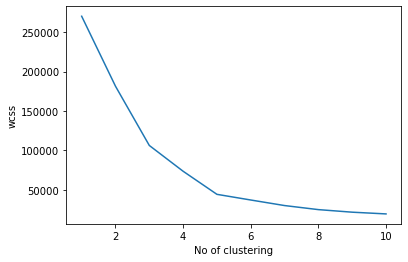

In [9]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i ,init='k-means++',max_iter=300,n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('No of clustering')
plt.ylabel('wcss')
plt.show()

### As we can see we get value K=5 as per elbow metho

In [10]:
km=KMeans(n_clusters=5)
y_mean=km.fit_predict(X)

In [11]:
data['cluster']=y_mean
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### Ploting the cluster

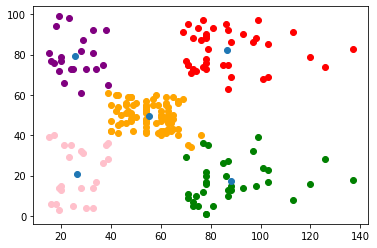

In [12]:
plt.scatter(X[y_mean==0, 0],X[y_mean==0,1],c='red')
plt.scatter(X[y_mean==1, 0],X[y_mean==1,1],c='green')
plt.scatter(X[y_mean==2, 0],X[y_mean==2,1],c='orange')
plt.scatter(X[y_mean==3, 0],X[y_mean==3,1],c='purple')
plt.scatter(X[y_mean==4, 0],X[y_mean==4,1],c='pink')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

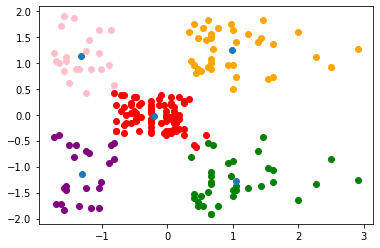

In [17]:
km=KMeans(n_clusters=5)
y_mean=km.fit_predict(X)

plt.scatter(X[y_mean==0, 0],X[y_mean==0,1],c='red')
plt.scatter(X[y_mean==1, 0],X[y_mean==1,1],c='green')
plt.scatter(X[y_mean==2, 0],X[y_mean==2,1],c='orange')
plt.scatter(X[y_mean==3, 0],X[y_mean==3,1],c='purple')
plt.scatter(X[y_mean==4, 0],X[y_mean==4,1],c='pink')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])
plt.show()

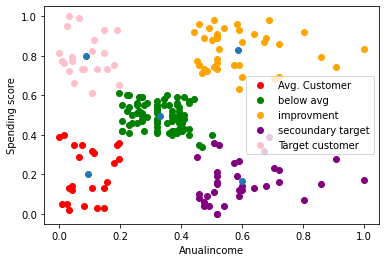

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)

km=KMeans(n_clusters=5 ,init='k-means++',max_iter=1900,n_init=30) #,random_state=0)
y_mean=km.fit_predict(X)

plt.scatter(X[y_mean==0, 0],X[y_mean==0,1],c='red',label='Avg. Customer')
plt.scatter(X[y_mean==1, 0],X[y_mean==1,1],c='green',label='below avg')
plt.scatter(X[y_mean==2, 0],X[y_mean==2,1],c='orange',label='improvment')
plt.scatter(X[y_mean==3, 0],X[y_mean==3,1],c='purple',label='secoundary target')
plt.scatter(X[y_mean==4, 0],X[y_mean==4,1],c='pink', label='Target customer')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])
plt.legend()
plt.xlabel('Anualincome')
plt.ylabel('Spending score')
plt.show()

# Hierarchical Clustering  Dendrogram

In [32]:
import scipy.cluster.hierarchy as sch

### dendrogram after scaling the data

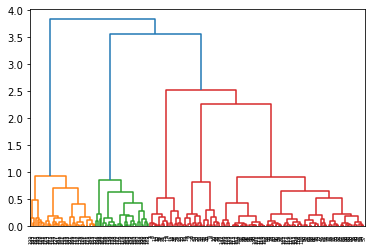

In [33]:
dendro = sch.dendrogram(sch.linkage(X, method='ward'))

In [36]:
X_1=data.iloc[:,3:5].values


### endrogram without scaling the data

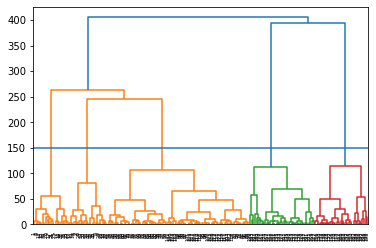

In [43]:
dendro = sch.dendrogram(sch.linkage(X_1, method='ward'))
plt.axhline(y=150)
plt.show()

### Fitting the Hierarchical Clustering to the data set

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
HC= AgglomerativeClustering(n_clusters=5 , affinity='euclidean',linkage='ward')
Y_HC=HC.fit_predict(X_1)

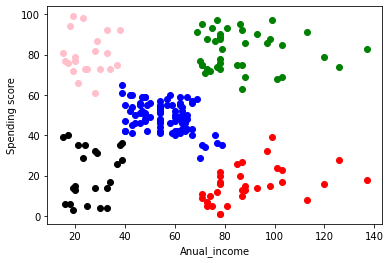

In [46]:
plt.scatter(X_1[Y_HC==0,0],X_1[Y_HC==0,1],c='red')
plt.scatter(X_1[Y_HC==1,0],X_1[Y_HC==1,1],c='blue')
plt.scatter(X_1[Y_HC==2,0],X_1[Y_HC==2,1],c='green')
plt.scatter(X_1[Y_HC==3,0],X_1[Y_HC==3,1],c='pink')
plt.scatter(X_1[Y_HC==4,0],X_1[Y_HC==4,1],c='black')
plt.xlabel('Anual_income')
plt.ylabel('Spending score')
plt.show()

### Using Manhattan distance and complete

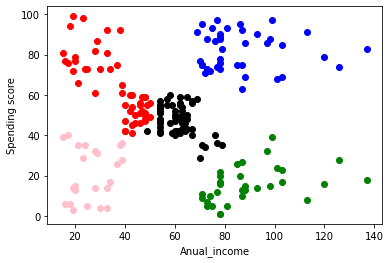

In [48]:
HC= AgglomerativeClustering(n_clusters=5 , affinity='manhattan',linkage='complete')
Y_HC=HC.fit_predict(X_1)

plt.scatter(X_1[Y_HC==0,0],X_1[Y_HC==0,1],c='red')
plt.scatter(X_1[Y_HC==1,0],X_1[Y_HC==1,1],c='blue')
plt.scatter(X_1[Y_HC==2,0],X_1[Y_HC==2,1],c='green')
plt.scatter(X_1[Y_HC==3,0],X_1[Y_HC==3,1],c='pink')
plt.scatter(X_1[Y_HC==4,0],X_1[Y_HC==4,1],c='black')
plt.xlabel('Anual_income')
plt.ylabel('Spending score')
plt.show()

### Using Cosine distance  and Average

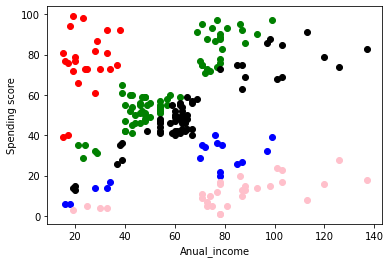

In [50]:
HC= AgglomerativeClustering(n_clusters=5 , affinity='Cosine',linkage='average')
Y_HC=HC.fit_predict(X_1)

plt.scatter(X_1[Y_HC==0,0],X_1[Y_HC==0,1],c='red')
plt.scatter(X_1[Y_HC==1,0],X_1[Y_HC==1,1],c='blue')
plt.scatter(X_1[Y_HC==2,0],X_1[Y_HC==2,1],c='green')
plt.scatter(X_1[Y_HC==3,0],X_1[Y_HC==3,1],c='pink')
plt.scatter(X_1[Y_HC==4,0],X_1[Y_HC==4,1],c='black')
plt.xlabel('Anual_income')
plt.ylabel('Spending score')
plt.show()

### From different method to obtain cluster Eculidin method gives best Clstering of data